In [29]:
import pickle
import numpy as np
import os
from tqdm import trange, tqdm

binned_values = 4000

num_bins = 10000000
# dir_path = "/user/as6154/dissert/szhalf_L12_delta_-2_to_0_interval_400_secondDelta_1_to_1_interval_1_data"
dir_path = "/shared/share_mala/andrew/diss/szhalf_L12_delta_-2_to_2_interval_4000_secondDelta_1_to_1_interval_1_data"


In [30]:
data = np.load("/shared/share_mala/andrew/diss/szhalf_L12_delta_-2_to_2_interval_4000_secondDelta_1_to_1_interval_1_data/delta_300_second_delta_0.npy")

In [31]:
data

array([1., 0., 0., ..., 0., 0., 0.])

In [32]:

# First pass: find global min and max
global_min = float('inf')
global_max = float('-inf')

for i in trange(binned_values):
    file_path = os.path.join(dir_path, f"delta_{i}_second_delta_0.npy")
    if os.path.exists(file_path):
        data = np.load(file_path)
        data_min = np.min(data)
        data_max = np.max(data)
        if data_min < global_min:
            global_min = data_min
        if data_max > global_max:
            global_max = data_max

# Second pass: bin the data and store it
binned_data = []

for i in trange(binned_values):
    file_path = os.path.join(dir_path, f"delta_{i}_second_delta_0.npy")
    if os.path.exists(file_path):
        data = np.load(file_path)
        
        # Perform binning using global min and max
        if global_max - global_min != 0:
            bins = np.linspace(global_min, global_max, num_bins + 1)
            binned_data.append(np.digitize(data, bins) - 1)  # Subtract 1 to make bins 0-indexed
        else:
            binned_data.append(np.zeros_like(data))

100%|██████████| 4000/4000 [02:12<00:00, 30.18it/s]


In [33]:
global_min

-0.47464546319648016

In [34]:
global_max

1.0

In [35]:
        
# Save the binned data as a pickle file
pickle_file_path = os.path.join(dir_path, f'{num_bins}_binned_values.pkl')
with open(pickle_file_path, 'wb') as f:
    pickle.dump(binned_data, f)

In [11]:

# Define the path to save the pickle file
pickle_file_path = f'{dir_path}/{num_bins}_binned_values.pkl'
with open(pickle_file_path, 'rb') as f:
    binned_data = pickle.load(f)

print(f"Binned values loaded from pickle file (first 10): {binned_data[:10]}")

Binned values loaded from pickle file (first 10): [array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218]), array([10000,  3218,  3218, ...,  3218,  3218,  3218])]


KeyboardInterrupt: 

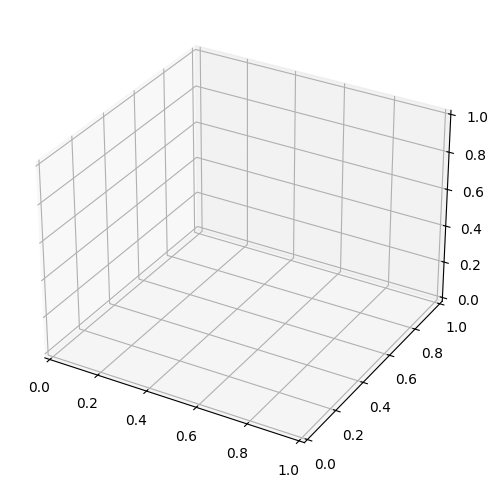

In [15]:
import matplotlib.pyplot as plt

# Flatten the binned data to get a single list of bin indices
all_bins = np.concatenate(binned_data)

# Plot the histogram of the bin indices
plt.figure(figsize=(10, 6))
plt.hist(all_bins, bins=num_bins, edgecolor='k', alpha=0.7)
plt.title('Distribution of Binned Values')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


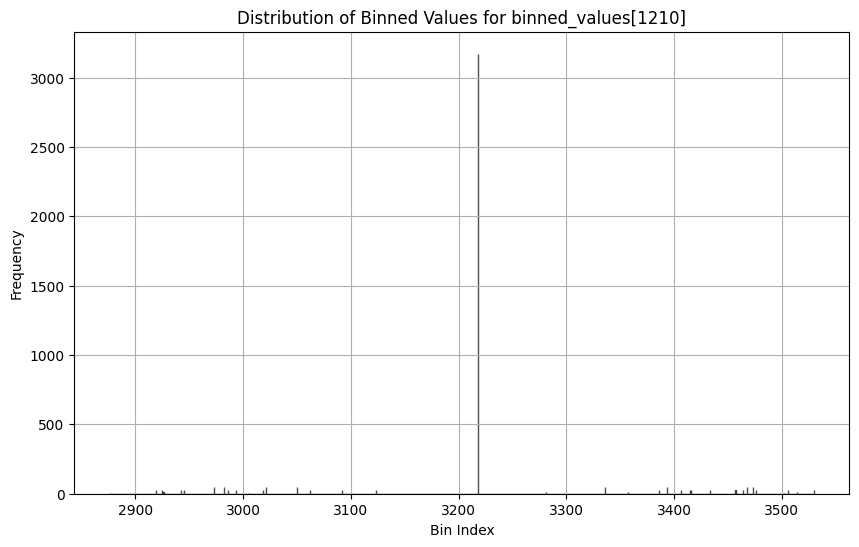

In [14]:
import matplotlib.pyplot as plt

# Select a single binned_values[i] to plot
i = 1210  # You can change this index to plot a different binned value
single_binned_value = binned_data[i]


plt.figure(figsize=(10, 6))
plt.hist(single_binned_value, bins=num_bins, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Binned Values for binned_values[{i}]')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:

# Define the path to save the pickle file
pickle_file_path = f'{dir_path}/{num_bins}_binned_values.pkl'
with open(pickle_file_path, 'rb') as f:
    binned_values_loaded = pickle.load(f)

print(f"Binned values loaded from pickle file (first 10): {binned_values_loaded[:10]}")